##***Level 1-Task 2-Descriptive Analysis***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# --- This part handles the file upload in Colab ---
print("Please upload your 'Dataset .csv' file:")
uploaded = files.upload()

# Get the file name you just uploaded
file_name = list(uploaded.keys())[0]
print(f"\nSuccessfully uploaded {file_name}")

# --- Task 1: Load the dataset and explore rows/columns ---
df = pd.read_csv(file_name)
print(f"\nThe dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

Please upload your 'Dataset .csv' file:


Saving cleaned_restaurant_dataset.csv to cleaned_restaurant_dataset.csv

Successfully uploaded cleaned_restaurant_dataset.csv

The dataset has 9551 rows and 21 columns.


##**1.Calculate Basic Statistical Measures**

In [6]:
# Select the numerical columns for analysis
# 'Aggregate rating' is included, and .describe() will automatically ignore the NaN (Not Rated) values
# 'Price range' is also a numerical category (1-4)
numerical_cols = ['Average Cost for two', 'Longitude', 'Latitude', 'Price range', 'Votes', 'Aggregate rating']

print("--- Statistical Summary for Numerical Columns ---")
print(df[numerical_cols].describe())

--- Statistical Summary for Numerical Columns ---
       Average Cost for two    Longitude     Latitude  Price range  \
count           9551.000000  9551.000000  9551.000000  9551.000000   
mean            1199.210763    64.126574    25.854381     1.804837   
std            16121.183073    41.467058    11.007935     0.905609   
min                0.000000  -157.948486   -41.330428     1.000000   
25%              250.000000    77.081343    28.478713     1.000000   
50%              400.000000    77.191964    28.570469     2.000000   
75%              700.000000    77.282006    28.642758     2.000000   
max           800000.000000   174.832089    55.976980     4.000000   

              Votes  Aggregate rating  
count   9551.000000       7403.000000  
mean     156.909748          3.440024  
std      430.169145          0.552195  
min        0.000000          1.800000  
25%        5.000000          3.000000  
50%       31.000000          3.400000  
75%      131.000000          3.800000  

##**2.Explore Categorical Variable Distributions**

In [7]:
print("--- Distribution of 'Country Code' ---")
# This shows all country codes and their counts
print(df['Country Code'].value_counts())
print("\n") # Adds a blank line

print("--- Distribution of 'City' (Top 10) ---")
# 'City' has 141 unique values, so we just want to see the top 10
print(df['City'].value_counts().head(10))
print("\n")

print("--- Distribution of 'Cuisines' (Top 10 Combined) ---")
# 'Cuisines' has 1825 unique combinations, so we'll look at the top 10
# Note: This counts 'North Indian, Chinese' as ONE category
print(df['Cuisines'].value_counts().head(10))

--- Distribution of 'Country Code' ---
Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: count, dtype: int64


--- Distribution of 'City' (Top 10) ---
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64


--- Distribution of 'Cuisines' (Top 10 Combined) ---
Cuisines
North Indian                      936
North Indian, Chinese             511
Fast Food                         354
Chinese                           354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dt

##**3.Identify Top Cuisines and Cities**

In [8]:
# The 'Cuisines' column has "North Indian, Chinese". We need to split this.
# 1. Split the strings by ', '
# 2. .explode() gives each split cuisine its own row
# 3. .value_counts() then counts these individual cuisines
# We also count 'Unknown' which we added in Task 1
individual_cuisines = df['Cuisines'].str.split(', ').explode()

print("--- Top 10 *Individual* Cuisines ---")
print(individual_cuisines.value_counts().head(10))

# We already have the top cities from the previous cell, but let's list them again clearly
print("\n--- Top 10 Cities with Most Restaurants ---")
print(df['City'].value_counts().head(10))

--- Top 10 *Individual* Cuisines ---
Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64

--- Top 10 Cities with Most Restaurants ---
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64


##**4.Visualization of Top 10 Cities and Cuisines with NO. of resturants**

/tmp/ipython-input-2411703467.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cuisines.values, y=top_10_cuisines.index, palette="viridis")


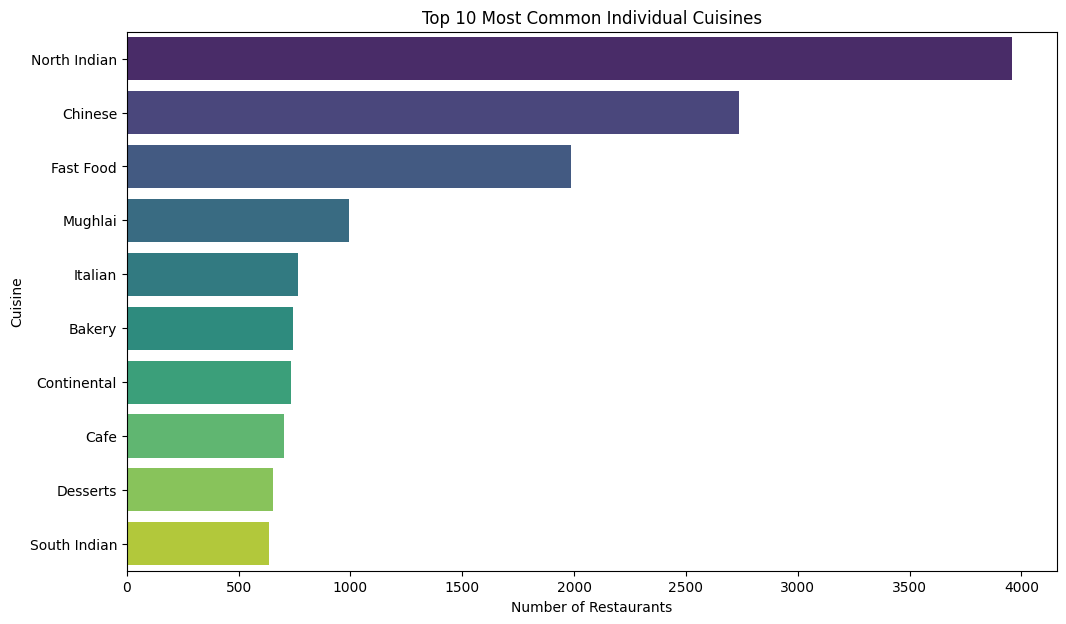

/tmp/ipython-input-2411703467.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette="mako")


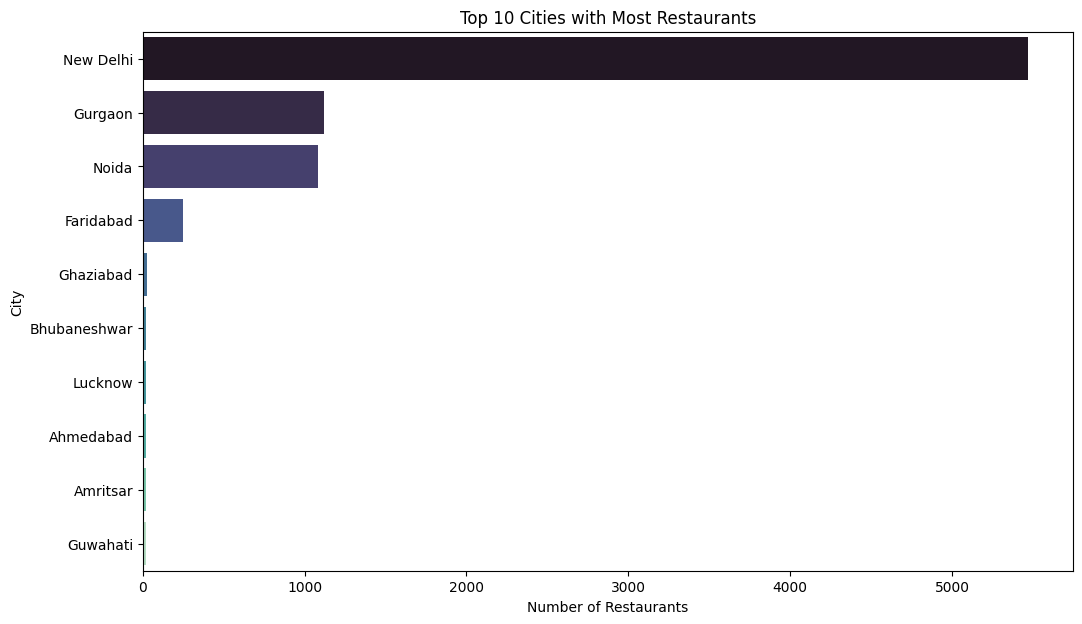

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the data for top 10 individual cuisines
top_10_cuisines = individual_cuisines.value_counts().head(10)

# Create the Cuisines plot
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_cuisines.values, y=top_10_cuisines.index, palette="viridis")
plt.title('Top 10 Most Common Individual Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
# Save the plot
plt.savefig('top_10_cuisines.png', bbox_inches='tight')
plt.show() # Show the plot in Colab

# Get the data for top 10 cities
top_10_cities = df['City'].value_counts().head(10)

# Create the City plot
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette="mako")
plt.title('Top 10 Cities with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
# Save the plot
plt.savefig('top_10_cities.png', bbox_inches='tight')
plt.show() # Show the plot in Colab

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# --- 1. Save the Cleaned DataFrame ---
# (This assumes 'df' is your DataFrame from the previous steps)
try:
    cleaned_file_name = "cleaned_restaurant_dataset.csv"
    df.to_csv(cleaned_file_name, index=False)
    print(f"Successfully saved: {cleaned_file_name}")

    # --- 2. Re-create and Save 'rating_distribution.png' ---
    plot_file_1 = "rating_distribution.png"
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Aggregate rating'].dropna(), bins=30, kde=True)
    plt.title("Distribution of Aggregate Ratings (Excluding 'Not Rated')")
    plt.xlabel("Aggregate rating")
    plt.ylabel("Frequency")
    plt.savefig(plot_file_1)
    plt.close() # Close the plot so it doesn't display
    print(f"Successfully saved: {plot_file_1}")

    # --- 3. Re-create and Save 'top_10_cuisines.png' ---
    plot_file_2 = "top_10_cuisines.png"
    # Re-create the data for the plot
    individual_cuisines = df['Cuisines'].str.split(', ').explode()
    top_10_cuisines = individual_cuisines.value_counts().head(10)
    # Create the plot
    plt.figure(figsize=(12, 7))
    sns.barplot(x=top_10_cuisines.values, y=top_10_cuisines.index, palette="viridis")
    plt.title('Top 10 Most Common Individual Cuisines')
    plt.xlabel('Number of Restaurants')
    plt.ylabel('Cuisine')
    plt.savefig(plot_file_2, bbox_inches='tight')
    plt.close()
    print(f"Successfully saved: {plot_file_2}")

    # --- 4. Re-create and Save 'top_10_cities.png' ---
    plot_file_3 = "top_10_cities.png"
    # Re-create the data for the plot
    top_10_cities = df['City'].value_counts().head(10)
    # Create the plot
    plt.figure(figsize=(12, 7))
    sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette="mako")
    plt.title('Top 10 Cities with Most Restaurants')
    plt.xlabel('Number of Restaurants')
    plt.ylabel('City')
    plt.savefig(plot_file_3, bbox_inches='tight')
    plt.close()
    print(f"Successfully saved: {plot_file_3}")

    # --- 5. Download All Files ---
    print("\nStarting downloads... Your browser will prompt you for each file.")
    files.download(cleaned_file_name)
    files.download(plot_file_1)
    files.download(plot_file_2)
    files.download(plot_file_3)
    print("Download complete.")

except NameError:
    print("Error: The DataFrame 'df' was not found.")
    print("Please make sure you have run all the previous cells to load and process the data first.")
except Exception as e:
    print(f"An error occurred: {e}")
    print("Please ensure 'df' exists and has the necessary columns ('Aggregate rating', 'Cuisines', 'City').")

Successfully saved: cleaned_restaurant_dataset.csv
Successfully saved: rating_distribution.png
Successfully saved: top_10_cuisines.png
Successfully saved: top_10_cities.png

Starting downloads... Your browser will prompt you for each file.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download complete.
